## Домашнее задание <a class='anchor' id='hw'>

1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
# tqdm - это библиотека, которая позволяет создавать красивые
# и информативные полосы прогресса в циклах,
# что улучшает визуализацию процесса выполнения.
import warnings
# модуль warnings, который позволяет управлять предупреждениями,
# выдаваемыми интерпретатором Python.
warnings.filterwarnings('ignore')
# устанавливает фильтр предупреждений на игнорирование предупреждений.
# Такой подход может быть полезен, если вы не хотите видеть предупреждения,
# которые не являются критическими для вашего кода или если они мешают читаемости вывода.

__Задача:__ предсказание баллов ЕГЭ ученика

In [4]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [5]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [6]:
def standard_scale(X):
    mean = X.mean(axis=0)
    # Вычисляет среднее значение каждого столбца в массиве X.
    # Параметр axis=0 указывает, что вычисления выполняются по столбцам.

    std = X.std(axis=0)
    # Вычисляет стандартное отклонение каждого столбца в массиве X.
    # Параметр axis=0 указывает, что вычисления выполняются по столбцам.

    return (X - mean) / std
    # Возвращает массив, в котором каждое значение из массива X
    # центрируется относительно среднего значения
    # и затем масштабируется на стандартное отклонение.
    # Таким образом, функция реализует масштабирование признаков
    # с помощью стандартного метода масштабирования (стандартизации).

In [7]:
# Создает копию массива X и приводит его к типу данных float64.
# Копия создается для того, чтобы избежать изменений в исходном массиве X.
X_st = X.copy().astype(np.float64)

# Применяет функцию standard_scale,
# которую мы определили ранее, к подмассиву X_st[:, 1:4].
# В данном случае X_st[:, 1:4] обозначает
# все строки и столбцы с индексами с 1 по 3 (включительно).
# Это значит, что применяется стандартное масштабирование
# к столбцам с индексами 1, 2 и 3 (индексация начинается с 0).
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

-4.163336342344337e-17 0.9999999999999999


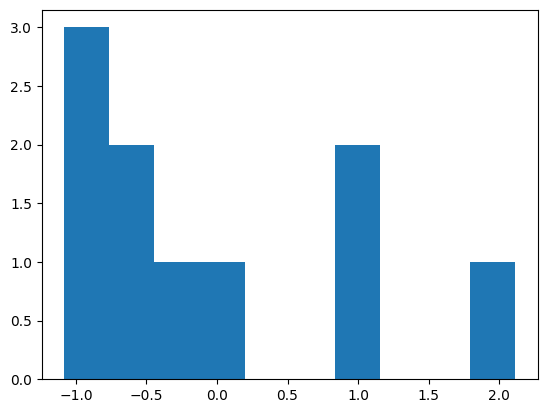

In [8]:
ind = 2
# Это индекс столбца в массиве X_st, который мы хотим анализировать.

print(np.mean(X_st[:, ind]), np.std(X_st[:, ind]))
# Выводит на экран среднее значение и стандартное отклонение значений
# в столбце с индексом ind в массиве X_st.
# X_st[:, ind] обозначает все значения в указанном столбце.

plt.hist(X_st[:, ind])
# Создает гистограмму (график распределения) значений в столбце
# с индексом ind в массиве X_st. Гистограмма показывает,
# как часто встречаются различные значения в столбце.
plt.show()

In [9]:
def calc_mse(y, y_pred):

    err = np.mean((y - y_pred) ** 2)
    # Вычисляет среднеквадратичную ошибку (MSE, Mean Squared Error)
    # между фактическими значениями y и предсказанными значениями y_pred.
    # Она вычисляется как среднее значение квадратов разностей
    # между фактическими и предсказанными значениями.

    return err

**1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.**

In [10]:
# W / np.abs(W)
# +1 / 1 = +
# -1 / 1 = -
# 0 / 0 = nan

In [11]:
np.sign(0)
# Это вызов функции sign из библиотеки NumPy (np).
# Функция sign возвращает знак числа.
# В данном случае аргументом является число 0.
# Так как 0 не имеет знака, функция вернет 0.

0

In [12]:
# Определение функции gradient_descent_reg_l1.
# Она принимает четыре аргумента:
# X - матрица признаков,
# y - вектор целевых значений,
# iterations - количество итераций градиентного спуска,
# eta - скорость обучения (по умолчанию 1e-4),
# reg - параметр регуляризации (по умолчанию 1e-8).
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    
    # Инициализирует вектор весов W случайными значениями
    # из стандартного нормального распределения.
    # Количество элементов в векторе равно
    # количеству признаков в матрице X.
    W = np.random.randn(X.shape[1])

    # Сохраняет количество наблюдений в переменную n.
    n = X.shape[0]
    
    for i in range(0, iterations):

        # Вычисляет предсказанные значения целевой переменной y
        # с использованием текущих весов W и матрицы признаков X.
        y_pred = np.dot(X, W)

        # Вычисляет среднеквадратичную ошибку между
        # фактическими значениями y и предсказанными значениями y_pred.
        err = calc_mse(y, y_pred)
        
        # Вычисляет градиент функции потерь (MSE)
        # по формуле градиента квадратичной ошибки.
        # @ обозначает матричное умножение.
        dQ = 2/n * X.T @ (y_pred - y)

        # Вычисляет градиент регуляризации L1, который является
        # производной абсолютной величины весов
        # и используется для уменьшения значений весов.
        dReg = reg * np.sign(W)
        
        # Обновляет веса W с учетом градиента функции потерь и градиента регуляризации.
        W -= eta * (dQ + dReg)
        
        # Проверяет, является ли текущая итерация одной из десяти итераций.
        if i % (iterations / 10) == 0:
            # Выводит информацию о текущей итерации, весах и значении ошибки.
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    # Выводит значение среднеквадратичной ошибки после завершения всех итераций.
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')

    # Возвращает обновленные веса W.
    return W

In [13]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-2)
# Это вызов функции gradient_descent_reg_l1 с аргументами:
#    - X_st: Матрица признаков, которая была масштабирована
#      с помощью стандартного метода масштабирования (стандартизации).
#    - y: Вектор целевых значений.
#    - iterations=5000: Количество итераций градиентного спуска задано равным 5000.
#    - eta=1e-2: Скорость обучения (learning rate) установлена на значение 0.01.
#    - reg=1e-2: Параметр регуляризации установлен на значение 0.01.

# Этот вызов функции позволяет выполнить градиентный спуск
# с регуляризацией L1 на масштабированных данных X_st
# с целевыми значениями y в течение 5000 итераций,
# используя скорость обучения 0.01 и параметр регуляризации 0.01.

Iter: 0, weights: [-0.17068255  1.67942864 -0.1953432  -0.79710609], error 3504.077839540324
Iter: 500, weights: [56.49267536  5.98845835  1.14574296  5.32922817], error 25.30428528762906
Iter: 1000, weights: [56.4949999   6.18836524  0.18366988  6.12272255], error 24.956554941301853
Iter: 1500, weights: [56.495       6.25016034 -0.1334994   6.39216217], error 24.913324204061887
Iter: 2000, weights: [56.495       6.27072088 -0.23793584  6.47938503], error 24.90707338934137
Iter: 2500, weights: [56.495       6.27847563 -0.27563809  6.51055651], error 24.905771285105246
Iter: 3000, weights: [56.495       6.281285   -0.2892144   6.52176497], error 24.905425562697296
Iter: 3500, weights: [56.495       6.28229714 -0.29410136  6.52579878], error 24.905317062826757
Iter: 4000, weights: [56.495       6.2826615  -0.2958604   6.52725069], error 24.905280074865296
Iter: 4500, weights: [56.495       6.28279265 -0.29649355  6.52777329], error 24.905267029007764
Final MSE: 24.905262367938512


array([56.495     ,  6.2828398 , -0.29672119,  6.52796118])

**2. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?**

In [14]:
# Технически, можно применить и нормализацию,
# и стандартизацию к одному и тому же признаку,
# но это может привести к избыточной обработке данных и искажению результатов.
# Нормализация и стандартизация имеют разные эффекты на данные:

# 1. Нормализация (например, Min-Max Scaling)
# масштабирует данные в заданный диапазон,
# обычно от 0 до 1 или -1 до 1. Это полезно,
# когда значения признаков имеют различные диапазоны
# и нужно установить одинаковый диапазон для всех признаков.

# 2. Стандартизация (например, Z-score Normalization)
# центрирует данные вокруг среднего значения
# и масштабирует их на стандартное отклонение.
# Это полезно, когда значения признаков имеют разные масштабы
# и нужно обеспечить, чтобы все признаки имели схожие шкалы.

# Применение обоих методов к одному признаку
# может привести к излишней обработке и потере информации.
# Обычно выбирают один метод масштабирования
# в зависимости от конкретных потребностей задачи и свойств данных.

In [15]:
def standard_scale(X):

    # Вычисляет среднее значение каждого столбца в матрице X.
    # Параметр axis=0 указывает, что вычисления выполняются по столбцам.
    mean = X.mean(axis=0)

    # Вычисляет стандартное отклонение каждого столбца в матрице X.
    # Параметр axis=0 указывает, что вычисления выполняются по столбцам.
    std = X.std(axis=0)

    # Возвращает матрицу X, в которой каждое значение центрировано
    # относительно среднего значения соответствующего столбца
    # и затем масштабировано на стандартное отклонение.
    # Таким образом, функция реализует масштабирование признаков
    # с помощью стандартного метода масштабирования (стандартизации).
    return (X - mean) / std

In [16]:
# Определение функции с именем min_max_scale,
# которая принимает один аргумент X,
# представляющий собой матрицу признаков.
def min_max_scale(X):

    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#     Вычисляет минимум и максимум для каждого столбца в матрице X
#     и затем выполняет мин-макс масштабирование. 
#    - X.min(axis=0): Эта часть кода вычисляет минимальное значение для каждого столбца в матрице X.
#    - X.max(axis=0): Эта часть кода вычисляет максимальное значение для каждого столбца в матрице X.
#    - (X - X.min(axis=0)): Вычитание минимального значения из каждого элемента матрицы X центрирует данные относительно нуля.
#    - (X.max(axis=0) - X.min(axis=0)): Этот код вычисляет разницу между максимальным
#      и минимальным значениями в каждом столбце, что определяет диапазон значений.
#    - Затем результат делится на этот диапазон, чтобы масштабировать данные к диапазону от 0 до 1.

In [17]:
# Создает копию исходного массива X
# и приводит его к типу данных float64.
# Копия создается для того,
# чтобы избежать изменений в исходном массиве X.
X_norm = X.copy().astype('float64')

# Применяет функцию min_max_scale,
# которая реализует метод мин-макс масштабирования, к подмассиву X_norm[:, 1:].
# В данном случае X_norm[:, 1:] обозначает все строки и столбцы, начиная со второго (индекс 1),
# таким образом, применяется масштабирование только к признакам, начиная со второго.
X_norm = min_max_scale(X_norm[:, 1:])

# Вычисляет минимальное / максимальное значение для каждого столбца в массиве X_norm.
# Параметр axis=0 указывает, что вычисления выполняются по столбцам.
X_norm.min(axis=0), X_norm.max(axis=0)

# Таким образом, в итоге мы получаем минимальные и максимальные значения
# для каждого столбца массива X_norm после применения мин-макс масштабирования.

(array([0., 0., 0.]), array([1., 1., 1.]))

In [18]:
# Вычисляет среднее значение / стандартное отклонение для каждого столбца в массиве X_norm.
# Параметр axis=0 указывает, что вычисления выполняются по столбцам.
X_norm.mean(axis=0), X_norm.std(axis=0)

# Таким образом, в результате мы получаем средние значения
# и стандартные отклонения для каждого столбца массива X_norm.
# Эти значения могут использоваться для анализа
# и интерпретации данных после применения мин-макс масштабирования.

(array([0.3       , 0.33870968, 0.35      ]),
 array([0.28284271, 0.31283671, 0.39051248]))

In [19]:
# Вызывает функцию standard_scale, которая реализует стандартное масштабирование (стандартизацию),
# и применяет ее к массиву X_norm. Каждый столбец в массиве центрируется
# относительно его среднего значения и масштабируется на стандартное отклонение.
X_norm_st = standard_scale(X_norm)

# Вычисляет минимальное / максимальное значение для каждого столбца в массиве X_norm_st,
# который был стандартизирован с помощью функции standard_scale.
# Параметр axis=0 указывает, что вычисления выполняются по столбцам.
X_norm_st.min(axis=0), X_norm_st.max(axis=0)

# Таким образом, в результате мы получаем минимальные
# и максимальные значения для каждого столбца массива X_norm_st
# после применения стандартного масштабирования.

(array([-1.06066017, -1.08270439, -0.89625816]),
 array([2.47487373, 2.11385144, 1.66447944]))

In [20]:
# вычисляет среднее значение / стандартное отклонение для каждого столбца в массиве X_norm_st,
# который был стандартизирован с помощью функции standard_scale.
# Параметр axis=0 указывает, что вычисления выполняются по столбцам.
X_norm_st.mean(axis=0), X_norm_st.std(axis=0)

# Таким образом, в результате мы получаем средние значения
# и стандартные отклонения для каждого столбца массива X_norm_st,
# который был стандартизирован с помощью функции standard_scale.
# Эти значения могут использоваться для анализа
# и интерпретации данных после применения стандартного масштабирования.

(array([-1.49880108e-16, -6.86950496e-17,  8.32667268e-17]),
 array([1., 1., 1.]))

**3. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.**

In [22]:
# Импортирует модуль datasets из библиотеки sklearn,
# который содержит наборы данных для экспериментов и примеров.
from sklearn import datasets

# Вызывает функцию make_regression для генерации синтетических данных для задачи регрессии.
# Параметры функции:
#    - n_samples=100000: Количество образцов данных. В данном случае 100000.
#    - n_features=20: Количество признаков (факторов). В данном случае 20.
#    - n_informative=10: Количество информативных признаков,
#      которые действительно влияют на целевую переменную. В данном случае 10.
#    - n_targets=1: Количество целевых переменных. В данном случае 1.
#    - noise=5: Уровень шума в данных (стандартное отклонение случайной ошибки). В данном случае 5.
#    - coef=True: Если установлено в True, функция возвращает истинные коэффициенты,
#      используемые для создания данных. В данном случае это означает,
#      что возвращается истинный вектор коэффициентов.
#    - random_state=2: Зерно случайности для воспроизводимости результатов.
X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=2)

# Выводит сгенерированные данные X (матрица признаков), Y (вектор целевых переменных)
# и coef (истинный вектор коэффициентов) на экран с помощью функции display.
display(X, Y, coef)

array([[-0.71760732, -1.09367119, -0.73597009, ..., -0.09194752,
         0.77271648, -0.5294093 ],
       [-0.21856062, -0.43937009,  1.17601766, ..., -0.44205731,
         0.65967443, -0.5364636 ],
       [-0.09232329, -0.04777714,  0.58128624, ..., -0.64041891,
         1.29076796, -0.34530826],
       ...,
       [-0.1724219 ,  1.20477844,  0.77081956, ...,  1.78646758,
        -0.59041036, -0.6747931 ],
       [ 0.93830193, -0.05266006,  1.45767292, ..., -1.01765261,
         0.02393901,  1.37086726],
       [-0.99582701,  1.30720547, -0.04855569, ...,  1.85683052,
        -0.26133944,  0.50888458]])

array([-133.10543687,   44.01778172,   48.98233093, ..., -271.14963388,
        161.66813826,  380.05918834])

array([8.03590530e+00, 9.63394753e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.86058430e+01, 0.00000000e+00, 0.00000000e+00,
       9.61298231e+01, 5.95379955e+01, 0.00000000e+00, 3.30583257e+01,
       3.71965212e+01, 6.59198012e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.78539772e+01, 0.00000000e+00, 7.36381949e+01])

In [23]:
# Вызывает функцию standard_scale,
# которая реализует стандартное масштабирование (стандартизацию),
# и применяет ее к массиву X. Каждый столбец в массиве центрируется
# относительно его среднего значения и масштабируется на стандартное отклонение.
# Полученный результат сохраняется в переменную X, перезаписывая исходные данные.
X = standard_scale(X)

In [24]:
# Устанавливает зерно генератора случайных чисел библиотеки NumPy равным 9.
# Это делает генерацию случайных чисел воспроизводимой:
# каждый раз, когда вы вызываете функции генерации случайных чисел
# из библиотеки NumPy после установки этого зерна,
# вы получите одни и те же результаты.
np.random.seed(9)

# Создает начальные веса (вектор весов) для использования в алгоритме обучения.
# np.random.randn(X.shape[1]) создает массив случайных чисел
# из стандартного нормального распределения размером,
# соответствующим количеству признаков в матрице X.
# В данном случае это вектор init_W,
# содержащий случайные начальные значения весов.
init_W = np.random.randn(X.shape[1])

# Возвращает созданный вектор начальных весов.
init_W

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02,
       -3.78361464e-01, -4.81135363e-01, -1.51733118e+00, -4.90871981e-01,
       -2.40680579e-01, -6.47947460e-01,  6.35891080e-01,  1.74011731e+00,
        2.96682218e-01,  7.07503662e-01,  1.82281576e+00,  4.30769029e-01,
        1.54272963e+00, -9.00721171e-01, -1.37125010e-01,  1.29757901e+00])

In [25]:
# стохастический градиентный спуск
# Определение функции stohastic_gradient_descent.
# Она принимает следующие аргументы:
#    - W: Начальные веса (вектор весов).
#    - X: Матрица признаков.
#    - Y: Вектор целевых значений.
#    - iterations: Количество итераций градиентного спуска.
#    - eta=1e-4: Скорость обучения (по умолчанию 0.0001).
#    - size=1: Размер подвыборки (по умолчанию 1).
def stohastic_gradient_descent(W, X, Y, iterations, eta=1e-4, size=1):

    # Сохраняет количество наблюдений в переменную n.
    n = X.shape[0]
    
    errors = []

    # Создает список, в который будут добавляться значения весов на каждой итерации.
    # На первой итерации в список добавляется копия начальных весов.
    w_list = [W.copy()]

    for i in range(0, iterations):

        # Генерирует случайный индекс для формирования подвыборки.
        # np.random.randint(X.shape[0], size=size) создает массив
        # случайных целых чисел от 0 до X.shape[0] - 1 размером size.
        train_ind = np.random.randint(X.shape[0], size=size)

        # Вычисляет предсказанные значения целевой переменной
        # на подвыборке train_ind с использованием
        # текущих весов W и матрицы признаков X.
        y_pred = np.dot(X[train_ind], W)

        # Обновляет веса W с использованием стохастического градиентного спуска.
        # Здесь происходит вычитание отклонения предсказанных значений от фактических,
        # умноженного на матрицу признаков и скорость обучения.
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        # Вычисляет среднеквадратичную ошибку
        # на всей выборке с использованием текущих весов W.
        error = calc_mse(Y, np.dot(X, W))

        # Добавляет значение ошибки в список ошибок.
        errors.append(error)

        # Добавляет текущие веса W в список весов.
        w_list.append(W)
        
        # Проверяет, является ли текущая итерация одной из десяти итераций.
        if i % (iterations / 10) == 0:
            # Если условие выполнено, эта строка выводит информацию
            # о текущей итерации и значении ошибки.
            print(f'Iter: {i}, error {error}')
    
    # Выводит окончательное значение среднеквадратичной ошибки
    # после завершения всех итераций.
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')

    # Возвращает обновленные веса W, список ошибок на каждой итерации
    # и список значений весов на каждой итерации.
    return W, errors, w_list

In [26]:
# классический  GD

# Определение функции gradient_descent. Она принимает следующие аргументы:
#    - W: Начальные веса (вектор весов).
#    - X: Матрица признаков.
#    - y: Вектор целевых значений.
#    - iterations: Количество итераций градиентного спуска.
#    - eta=1e-4: Скорость обучения (по умолчанию 0.0001).
def gradient_descent(W, X, y, iterations, eta=1e-4):

    # Сохраняет количество наблюдений в переменную n.
    n = X.shape[0]
    
    errors = []

    # Создает список, в который будут добавляться значения весов на каждой итерации.
    # На первой итерации в список добавляется копия начальных весов.
    w_list = [W.copy()]
    
    for i in range(0, iterations):

        # Вычисляет предсказанные значения целевой переменной
        # на всей выборке с использованием текущих весов W и матрицы признаков X.
        y_pred = np.dot(X, W)

        # Вычисляет среднеквадратичную ошибку на всей выборке
        # с использованием предсказанных значений y_pred и истинных значений y.
        err = calc_mse(y, y_pred)

        # Добавляет значение ошибки в список ошибок.
        errors.append(err)
        
        # Вычисляет градиент функции ошибки.
        # X.T @ (y_pred - y) - это произведение матрицы признаков X
        # транспонированной на разницу между
        # предсказанными значениями y_pred и истинными значениями y.
        dQ = 2/n * X.T @ (y_pred - y)

        # Обновляет веса W с использованием градиентного спуска.
        # Мы вычитаем от прошлых весов градиент,
        # умноженный на скорость обучения eta.
        W -= (eta * dQ)

        # Добавляет текущие веса W в список весов.
        w_list.append(W.copy())
        
        # Проверяет, является ли текущая итерация одной из десяти итераций.
        if i % (iterations / 10) == 0:
            # Если условие выполнено, эта строка выводит информацию
            # о текущей итерации и значении ошибки.
            print(f'Iter: {i}, error {err}')
    # Выводит окончательное значение среднеквадратичной ошибки после завершения всех итераций.    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')

    # Возвращает обновленные веса W, список ошибок на каждой итерации
    # и список значений весов на каждой итерации.
    return W, errors, w_list

In [27]:
%%time
# Эта строка является магической командой в блокнотах Jupyter и IPython,
# которая используется для измерения времени выполнения всей ячейки.

weights_GD, errors_GD, w_list_GD = gradient_descent(init_W, X, Y, iterations=5000, eta=1e-3)
# Эта строка вызывает функцию gradient_descent с определенными аргументами
# и присваивает возвращаемые значения переменным
# weights_GD, errors_GD, и w_list_GD.
# Аргументы функции:
#    - init_W: Начальные веса (вектор весов).
#    - X: Матрица признаков.
#    - Y: Вектор целевых значений.
#    - iterations=5000: Количество итераций градиентного спуска (по умолчанию 5000).
#    - eta=1e-3: Скорость обучения (по умолчанию 0.001).

# Таким образом, эта строка выполняет градиентный спуск
# с заданными параметрами и измеряет время выполнения этой операции.

Iter: 0, error 27979.272752767254
Iter: 500, error 3738.23221757507
Iter: 1000, error 518.6388255248812
Iter: 1500, error 90.72566724830706
Iter: 2000, error 33.81199274291517
Iter: 2500, error 26.23694585114313
Iter: 3000, error 25.2280115236372
Iter: 3500, error 25.093533811524267
Iter: 4000, error 25.075596872220995
Iter: 4500, error 25.073202688051442
Final MSE: 25.072882888141045
CPU times: total: 1min 43s
Wall time: 1min 12s


In [28]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(np.random.randn(X.shape[1]), X, Y, iterations=5000, eta=1e-3, size=1)
# Вызывает функцию stohastic_gradient_descent с определенными аргументами
# и присваивает возвращаемые значения переменным
# weights_SGD, errors_SGD и w_list_SGD.
# Аргументы функции:
#    - init_W: Начальные веса (вектор весов).
#    - X: Матрица признаков.
#    - Y: Вектор целевых значений.
#    - iterations=5000: Количество итераций градиентного спуска (по умолчанию 5000).
#    - eta=1e-3: Скорость обучения (по умолчанию 0.001).
#    - size=1: Размер подвыборки (по умолчанию 1).

# Таким образом, эта строка выполняет стохастический градиентный спуск
# с заданными параметрами и измеряет время выполнения этой операции.

Iter: 0, error 28087.67972997101
Iter: 500, error 3770.0442619195705
Iter: 1000, error 664.9189937647117
Iter: 1500, error 117.95244650887157
Iter: 2000, error 39.12318315284555
Iter: 2500, error 27.952883689521173
Iter: 3000, error 25.987917825198398
Iter: 3500, error 25.64473853921552
Iter: 4000, error 25.616916194200293
Iter: 4500, error 25.578112991924343
Final MSE: 25.567766841972453
CPU times: total: 25.4 s
Wall time: 8.98 s


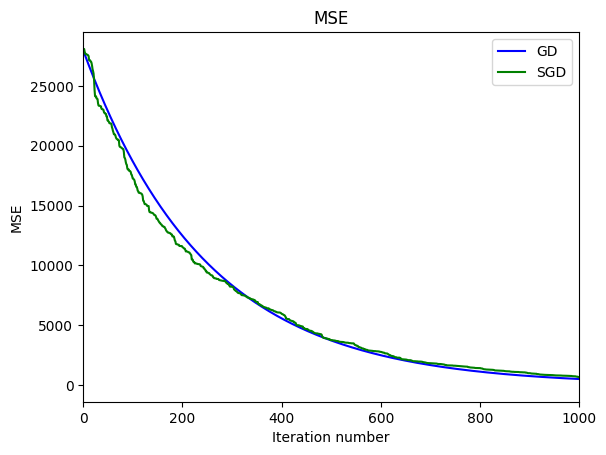

In [29]:
# Визуализируем изменение функционала ошибки

plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
# Создает график с помощью функции plot из библиотеки matplotlib.pyplot.
# Она строит линейный график ошибок для метода градиентного спуска (GD). 
#    - range(len(errors_GD)): Это генерирует последовательность чисел
#      от 0 до длины списка errors_GD, что представляет собой номера итераций.
#    - errors_GD: Это список значений ошибок для метода градиентного спуска (GD).
#    - color='b': Это параметр, который задает цвет линии графика (синий).
#    - label='GD': Это параметр, который задает метку для линии графика,
#      которая будет использована в легенде.

plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')
# Создает второй линейный график ошибок для метода стохастического градиентного спуска (SGD).
#    - range(len(errors_SGD)): Это генерирует последовательность чисел
#      от 0 до длины списка errors_SGD, что представляет собой номера итераций.
#    - errors_SGD: Это список значений ошибок для метода стохастического градиентного спуска (SGD).
#    - color='g': Это параметр, который задает цвет линии графика (зеленый).
#    - label='SGD': Это параметр, который задает метку для линии графика,
#      которая будет использована в легенде.

# Таким образом, эти две строки создают два графика ошибок
# для методов градиентного спуска (GD)
# и стохастического градиентного спуска (SGD)
# и отображают их на одном графике.

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

In [30]:
w_list_GD = np.array(w_list_GD)
w_list_SGD = np.array(w_list_SGD)

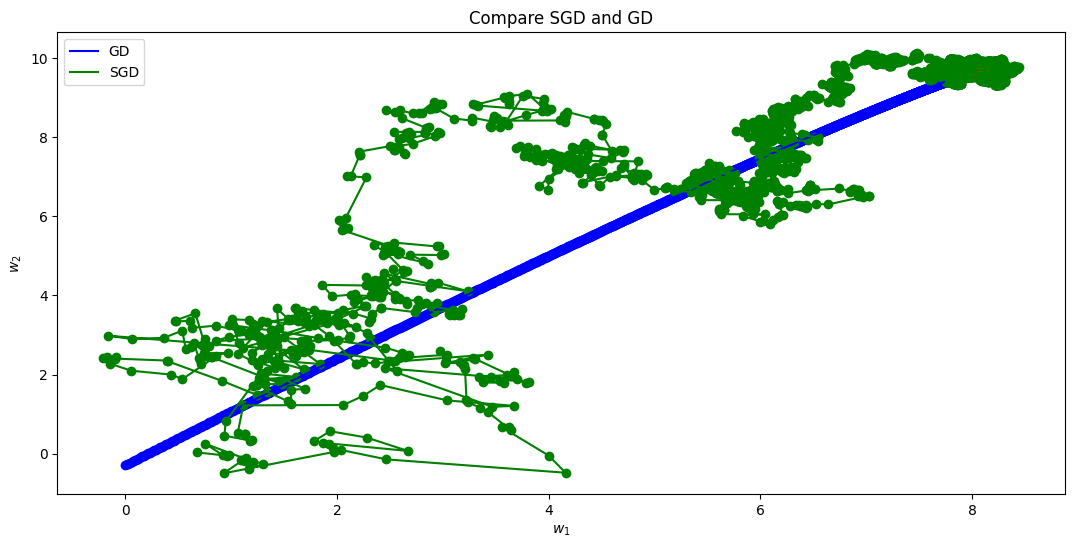

In [31]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1], color='b')
# Создает scatter plot (диаграмму рассеяния) для метода градиентного спуска (GD). 
#    - w_list_GD[:, 0]: Это значения первого веса (W0) из списка w_list_GD.
#    - w_list_GD[:, 1]: Это значения второго веса (W1) из списка w_list_GD.
#    - color='b': Это параметр, который задает цвет точек на диаграмме рассеяния (синий).

plt.plot(w_list_GD[:, 0], w_list_GD[:, 1], color='b', label='GD')
# Создает линейный график для метода градиентного спуска (GD). 
#    - w_list_GD[:, 0]: Это значения первого веса (W0) из списка w_list_GD.
#    - w_list_GD[:, 1]: Это значения второго веса (W1) из списка w_list_GD.
#    - color='b': Это параметр, который задает цвет линии графика (синий).
#    - label='GD': Это параметр, который задает метку для линии графика,
#      которая будет использована в легенде.


plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g')
# Создает scatter plot (диаграмму рассеяния) для метода стохастического градиентного спуска (SGD). 
#    - w_list_SGD[:, 0]: Это значения первого веса (W0) из списка w_list_SGD.
#    - w_list_SGD[:, 1]: Это значения второго веса (W1) из списка w_list_SGD.
#    - color='g': Это параметр, который задает цвет точек на диаграмме рассеяния (зеленый).

plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g', label='SGD')
# Создает линейный график для метода стохастического градиентного спуска (SGD). 
#    - w_list_SGD[:, 0]: Это значения первого веса (W0) из списка w_list_SGD.
#    - w_list_SGD[:, 1]: Это значения второго веса (W1) из списка w_list_SGD.
#    - color='g': Это параметр, который задает цвет линии графика (зеленый).
#    - label='SGD': Это параметр, который задает метку для линии графика,
#      которая будет использована в легенде.

plt.scatter(coef[0], coef[1], c='r')
# Создает точку на диаграмме рассеяния для истинных значений весов (коэффициентов).
#    - coef[0]: Это значение первого коэффициента из вектора coef.
#    - coef[1]: Это значение второго коэффициента из вектора coef.
#    - c='r': Это параметр, который задает цвет точки (красный).

plt.legend()
plt.show()

Как видно по коду выше, метод стохастического градиентноог спуска выполняется в разы быстрее, чем метод классического градиентного спуска.